<a href="https://colab.research.google.com/github/Pavithra826/Pavi/blob/main/True_%26_Fake_news_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as nd
import pandas as pd

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
test=pd.read_csv('/content/drive/MyDrive/DataSets/True and Fake News Prediction/test.csv')

In [43]:
train=pd.read_csv('/content/drive/MyDrive/DataSets/True and Fake News Prediction/train.csv')

#DATA STRUCTURE AND CONTENT

In [44]:
train.shape

(20800, 5)

In [45]:
test.shape

(5200, 4)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [48]:
train.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [49]:
test.isnull().sum()

,0
id,0
title,122
author,503
text,7


In [50]:
train.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [51]:
test.describe()

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [52]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [53]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


#DATA PREPROCESSING

1.Removing the null values

In [54]:
train=train.fillna('')

In [55]:
train.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [56]:
test=test.fillna('')

In [57]:
test.isnull().sum()

,0
id,0
title,0
author,0
text,0


In [58]:
train['subject']=train['author']+ '' +train['title']

In [59]:
train.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


2.Tokenization

In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
from nltk.tokenize import word_tokenize
train['tokens']=train['subject']. apply (word_tokenize)

In [62]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [63]:

from nltk.tokenize import word_tokenize

# Assuming 'title' is the column you want to tokenize
test['tokens'] = test['title'].apply(word_tokenize)

# If you are unsure of the column names, print them out
print(test.columns)

Index(['id', 'title', 'author', 'text', 'tokens'], dtype='object')


In [64]:
test.head()

,id,title,author,text,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","[Specter, of, Trump, Loosens, Tongues, ,, if, ..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,"[#, NoDAPL, :, Native, American, Leaders, Vow,..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","[Tim, Tebow, Will, Attempt, Another, Comeback,..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,"[Keiser, Report, :, Meme, Wars, (, E995, )]"


3.LOWER CASTING FOR TEXT

Lowercasing text is a common preprocessing step in natural language processing (NLP) and text analysis. It involves converting all the characters in a text dataset to lowercase. This step is crucial for standardizing text data, especially when working with tasks like text classification, sentiment analysis, or any NLP-related project.

In [65]:

train['subject']=train['subject'].str.lower
# Assuming 'text_column' is the column

In [66]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,<bound method StringMethods.lower of <pandas.c...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,<bound method StringMethods.lower of <pandas.c...,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,<bound method StringMethods.lower of <pandas.c...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,<bound method StringMethods.lower of <pandas.c...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,<bound method StringMethods.lower of <pandas.c...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [67]:

# Check if 'subject' column exists in the DataFrame
if 'subject' in test.columns:
    test['subject'] = test['subject'].str.lower()
    # Assuming 'text_column' is the column in
else:
    print("Column 'subject' not found in the DataFrame.")

Column 'subject' not found in the DataFrame.


In [68]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,<bound method StringMethods.lower of <pandas.c...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,<bound method StringMethods.lower of <pandas.c...,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,<bound method StringMethods.lower of <pandas.c...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,<bound method StringMethods.lower of <pandas.c...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,<bound method StringMethods.lower of <pandas.c...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


4.Removal of punctation

Removing punctuation is another common preprocessing step in natural language processing (NLP) and text analysis. It involves eliminating punctuation marks from text data to simplify the text and focus on the actual content, which can improve the performance of various text-based algorithms

In [69]:

train['subject']=train['subject'].str.replace('[^\w\s]','')
# used to remove punctuation from the subject column in the train

In [70]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,NaN,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [71]:

# Check if 'subject' column exists in the 'test' DataFrame
if 'subject' in test.columns:
    test['subject'] = test['subject'].str.replace('[^\w\s]', '')
    # used to remove punctuation from the subject column in the test DataFrame.
else:
    print("The 'subject' column does not exist in the 'test' DataFrame.")

The 'subject' column does not exist in the 'test' DataFrame.


In [72]:
test.head()

,id,title,author,text,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","[Specter, of, Trump, Loosens, Tongues, ,, if, ..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,"[#, NoDAPL, :, Native, American, Leaders, Vow,..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","[Tim, Tebow, Will, Attempt, Another, Comeback,..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,"[Keiser, Report, :, Meme, Wars, (, E995, )]"


5.Removal of stopwords

Removing stopwords is another essential preprocessing step in natural language processing (NLP) and text analysis. Stopwords are common words like "and," "the," "is," "in," etc., that usually do not carry significant meaning and can be removed to reduce the dimensionality of the data and focus on the more meaningful words.

In [73]:
from nltk.corpus import stopwords

In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:

SW = set(stopwords.words('english'))
print(SW)
# Showcasing the stopwords in English

{'not', 'no', "aren't", 'whom', 'when', 'herself', 'this', 'with', 'because', 't', 're', 'more', 'he', 'it', 'once', 'all', 'who', 'him', 'did', 'if', 'by', 'was', 'ours', 'have', 'will', 'hasn', 'the', 'being', 'y', 'such', "mustn't", 'his', "should've", 'o', "doesn't", "isn't", 'what', 'your', "couldn't", 'too', 'yourself', 'on', 'weren', 'doing', "don't", 'through', 'or', 'has', 'there', 'm', 's', 'had', 'yours', 'ourselves', 'ma', "hasn't", 'i', 'why', 'same', 'during', 'do', 'her', 'here', 'below', 'hers', 'further', 'are', 'be', 'both', "you've", 'only', 'between', 'hadn', 'again', 'does', 'how', 'themselves', 'yourselves', 'most', 'don', 'didn', 'they', "needn't", 'were', "you'll", 'that', 'shan', 'wouldn', 'itself', "mightn't", 'can', 'from', "haven't", 'any', "you're", 'doesn', "that'll", 'himself', 'mustn', 'theirs', "shouldn't", 'won', 'above', 'should', 'aren', 'where', 'been', "hadn't", 've', "you'd", 'shouldn', 'ain', "wasn't", 'until', 'then', 'each', 'isn', 'as', 'them'

In [76]:

train['subject'] = train['subject'].apply(lambda x: ' '.join(['word for word in x.split() if word not in sw']))
# Here we try to remove the stopwords by adding only the words which are not in the sw stopword set.

In [77]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,word for word in x.split() if word not in sw,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,word for word in x.split() if word not in sw,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,word for word in x.split() if word not in sw,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,word for word in x.split() if word not in sw,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,word for word in x.split() if word not in sw,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [85]:

import pandas as pd
import nltk
from nltk.corpus import stopwords

# Assuming 'test.csv' contains your test data, replace with actual file name if different
test = pd.read_csv('test.csv')  # Load the test data

# Check available columns
print(test.columns)  # Print the columns to verify if 'subject' exists

# Replace 'actual_subject_column' with the correct column name from the output above
# if it's different from 'subject'
if 'subject' in test.columns:
    test['subject'] = test['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in SW]))
else:
    print("Column 'subject' not found in the DataFrame. Please check your CSV file.")

Index(['id', 'title', 'author', 'text'], dtype='object')
Column 'subject' not found in the DataFrame. Please check your CSV file.


In [86]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


6.Open a text box & type as Stemming or lammatization

Definition: Lemmatization is the process of reducing a word to its base or dictionary form, known as the "lemma." Unlike stemming, lemmatization considers the context of the word, using vocabulary and morphological analysis to return the proper base form.

Purpose: The goal is to group different inflected forms of a word together in order to analyze them as a single item. For example, "better" would be reduced to "good," and "running" to "run."

Algorithms: Lemmatization requires a corpus or a dictionary to find the correct base form of a word

In [87]:
from nltk.stem import PorterStemmer

In [88]:

# To apply Stemming or Lemmatization :
stemmer = PorterStemmer()
train['subject'] = train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [91]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,word for word in x.split() if word not in sw,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,word for word in x.split() if word not in sw,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,word for word in x.split() if word not in sw,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,word for word in x.split() if word not in sw,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,word for word in x.split() if word not in sw,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [92]:

# Handle potential float values in the 'title' column
test['title'] = test['title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in str(x).split()]) if isinstance(x, str) else '')

In [93]:
test.head()

,id,title,author,text
0,20800,"specter of trump loosen tongues, if not purs s...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,russian warship readi to strike terrorist near...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#nodapl: nativ american leader vow to stay all...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"tim tebow will attempt anoth comeback, thi tim...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,keiser report: meme war (e995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


7.Vectoritation

Vectorization is the process of converting text or categorical data into numerical form, which can be used as input for machine learning models. It is a crucial step in the preprocessing pipeline, especially for text data, as machine learning algorithms require numerical input to perform calculations.

In [94]:

x=train['subject']
y=train['label']

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:

Vt=TfidfVectorizer()
Vt.fit(x)

TfidfVectorizer()

In [97]:
x.head()

,subject
0,word for word in x.split() if word not in sw
1,word for word in x.split() if word not in sw
2,word for word in x.split() if word not in sw
3,word for word in x.split() if word not in sw
4,word for word in x.split() if word not in sw


In [98]:
x=Vt.transform(x)

In [99]:
print(x)

  (0, 6)	0.7071067811865476
  (0, 5)	0.23570226039551587
  (0, 4)	0.23570226039551587
  (0, 3)	0.23570226039551587
  (0, 2)	0.47140452079103173
  (0, 1)	0.23570226039551587
  (0, 0)	0.23570226039551587
  (1, 6)	0.7071067811865476
  (1, 5)	0.23570226039551587
  (1, 4)	0.23570226039551587
  (1, 3)	0.23570226039551587
  (1, 2)	0.47140452079103173
  (1, 1)	0.23570226039551587
  (1, 0)	0.23570226039551587
  (2, 6)	0.7071067811865476
  (2, 5)	0.23570226039551587
  (2, 4)	0.23570226039551587
  (2, 3)	0.23570226039551587
  (2, 2)	0.47140452079103173
  (2, 1)	0.23570226039551587
  (2, 0)	0.23570226039551587
  (3, 6)	0.7071067811865476
  (3, 5)	0.23570226039551587
  (3, 4)	0.23570226039551587
  (3, 3)	0.23570226039551587
  :	:
  (20796, 3)	0.23570226039551587
  (20796, 2)	0.47140452079103173
  (20796, 1)	0.23570226039551587
  (20796, 0)	0.23570226039551587
  (20797, 6)	0.7071067811865476
  (20797, 5)	0.23570226039551587
  (20797, 4)	0.23570226039551587
  (20797, 3)	0.23570226039551587
  (20797, 

In [100]:

# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [101]:

# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [108]:
Modal=LogisticRegression()

In [107]:
Modal.fit(x_train,y_train)

LogisticRegression()

In [111]:

# ipython-input-107-dda4ff91b424
Modal.fit(x_train,y_train) # Make sure you call fit on the same variable you instantiated your model in

LogisticRegression()

In [115]:

# ipython-input-114-9ab23880a38d
ytrpredict = Modal.predict(x_train) # Calculate predictions on training set

accuracy =accuracy_score(y_train,ytrpredict)
precision = precision_score(y_train, ytrpredict)
recall = recall_score(y_train, ytrpredict)
f1 = f1_score(y_train, ytrpredict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:

print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:', f1)

 Training Accuracy: 0.5004206730769231
 Training Precision: 0.0
 Training Recall: 0.0
Training F1 Score: 0.0


In [118]:
Yttpredict=Modal.predict(x_test)

In [120]:

accuracy  =accuracy_score(y_test,Yttpredict)
precision = precision_score(y_test, Yttpredict)
recall = recall_score(y_test, Yttpredict)
f1 = f1_score(y_test, Yttpredict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:

print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:', f1)

 Testing Accuracy: 0.4951923076923077
 Testing Precision: 0.0
 Testing Recall: 0.0
Testing F1 Score: 0.0


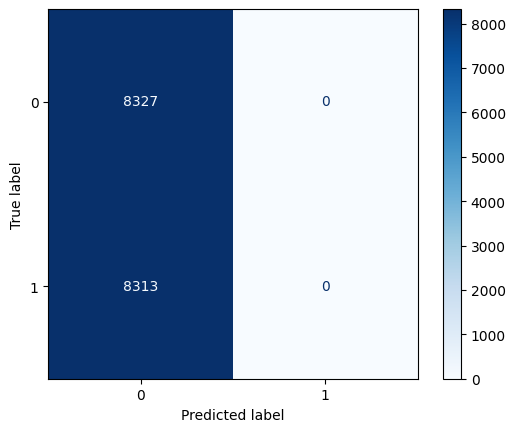

In [125]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_train,ytrpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Use the correct class name
disp.plot(cmap=plt.cm.Blues)

plt.show()

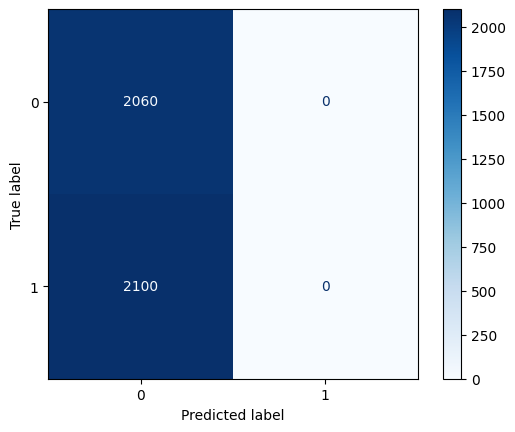

In [127]:

# Generate the confusion matrix
cm = confusion_matrix(y_test,Yttpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()